In [ ]:
pip install scikit-learn numpy pandas matplotlib

In [30]:
import pandas as pd
data = pd.read_csv('student-mat.csv', sep=';')

In [31]:
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [ ]:
from sklearn.preprocessing import LabelEncoder

data = pd.get_dummies(data, columns=['school', 'sex', 'address', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

In [32]:
label_encoder = LabelEncoder()
data['famsize'] = label_encoder.fit_transform(data['famsize'])
data['Pstatus'] = label_encoder.fit_transform(data['Pstatus'])
data['Mjob'] = label_encoder.fit_transform(data['Mjob'])
data['Fjob'] = label_encoder.fit_transform(data['Fjob'])
data['reason'] = label_encoder.fit_transform(data['reason'])
data['guardian'] = label_encoder.fit_transform(data['guardian'])


In [33]:
data.dropna(inplace=True)

In [35]:
target = 'G2'
X = data.drop([f'{target}'], axis=1)
y = data[f'{target}']

In [36]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling from 0 to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

In [37]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 2.20
Mean Absolute Error (MAE): 1.06


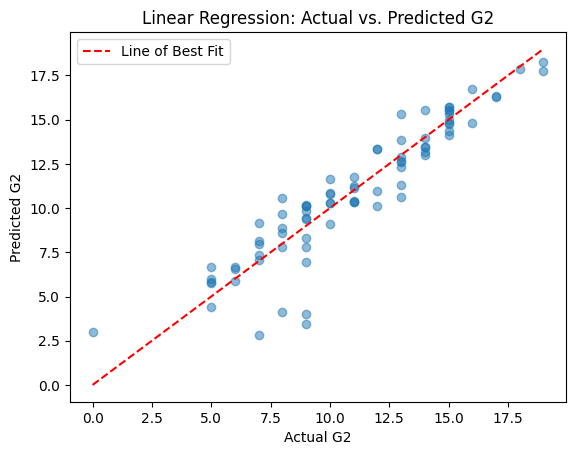

In [38]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel(f'Actual {target}')
plt.ylabel(f'Predicted {target}')
plt.title(f'Linear Regression: Actual vs. Predicted {target}')

# Add the line of best fit
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Line of Best Fit')

plt.legend()
plt.show()
